### Easy
1. How many unique customers are in the dataset?

In [9]:
## Customer ID, not by Name
import pandas as pd

df = pd.read_csv("fct_invoice.csv")

unique_customers = df["customer_id"].nunique() # nunique() for number, unique for value()

print ("Unique Customers:", unique_customers)

Unique Customers: 5191


2. What are the different categories of products available? How many unique categories are there?

In [17]:
different_cat = df["category"].unique()

unique_cat = df["category"].nunique()

print ("Categories Available:")
for category in different_cat:
    print (category)
print ("Unique Categories:", unique_cat)

Categories Available:
Clothing
Shoes
Books
Cosmetics
Food & Beverage
Toys
Technology
Souvenir
Unique Categories: 8


3. Which payment method is the most popular? How many times was it used?

In [26]:
pmt = df["payment_method"].value_counts() #longer: .groupby also split data into groups of unique, size for number of ele

most_popular_pm = pmt.idxmax() # returns index label where max
use_num = pmt.max() # returns max per column

print ("Most Popular:", most_popular_pm)
print ("Used:", use_num)

Most Popular: Cash
Used: 44447


### Medium
1. What are the three most popular categories, by total sales?

In [71]:
# total sales per unique category
# sales = units sold x ppu 
# price col is already sales

salespercat = df.groupby("category")["price"].sum()
three_most = salespercat.nlargest(3) #nlargest gives n largest values.

print ("Three Most Popular Categories by Total Sales\n")
print (three_most)

Three Most Popular Categories by Total Sales

category
Clothing      31075684.64
Shoes         18135336.89
Technology    15772050.00
Name: price, dtype: float64


2. What are the total sales attributed to customers over the age of 45?

In [52]:
import pandas as pd
import csv
import json

invoicesdf = pd.read_csv("fct_invoice.csv")
customersdf = pd.read_json("dim_customer.json")

# no age for customer_id, need to merge, with each sale (invoice)

joineddf = invoicesdf.merge(customersdf, left_on="customer_id", right_on="id", how="left") # left, right tells match, how: left prio, right prio, or both prio to satisfy

over45_req = joineddf[joineddf["age"] > 45] # call joineddf, only show age column for which this is true

total_sales_45 = over45_req["price"].sum()

print (f"Total sales atrributed to customers over age 45: {total_sales_45}")

Total sales atrributed to customers over age 45: 22370553.269999996


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

/var/folders/7d/186v11rd1d33_vj1z8dgqs700000gp/T/ipykernel_56749/2227174875.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(pd.Grouper(key="DateTime", freq = "M"))["price"].sum() # alt: df.groupby(df["DateTime"]).dt.to._period("M") | ["price"].sum()


<function matplotlib.pyplot.show(close=None, block=None)>

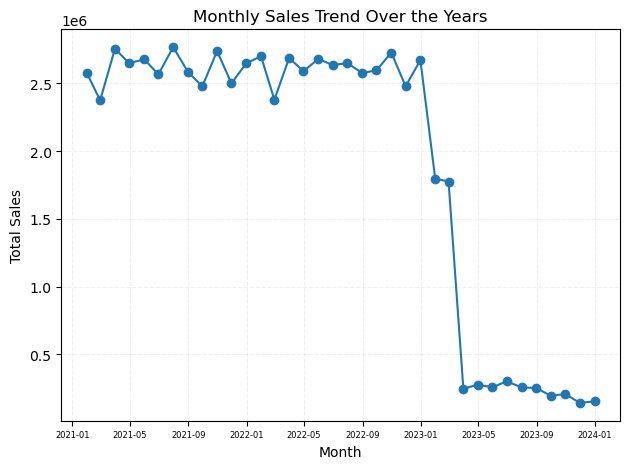

In [70]:
import pandas as pd
import csv
import json
import matplotlib as mp
import matplotlib.pyplot as plt

df = pd.read_csv("fct_invoice.csv")

df["DateTime"] = pd.to_datetime(df["invoice_date"], format = 'mixed') # time string to number. us and intl dates, acknowledge mix.

# total sales per month needed for trend
monthly = df.groupby(pd.Grouper(key="DateTime", freq = "M"))["price"].sum() # alt: df.groupby(df["DateTime"]).dt.to._period("M") | ["price"].sum()
# please group by datetime column, in "m" monthly bins (instead of the usual .groupby command alone)

plt.plot(monthly.index, monthly.values, marker = "o")
plt.title ("Monthly Sales Trend Over the Years", fontsize=12)
plt.xlabel("Month")
plt.xticks(fontsize=6)
plt.ylabel("Total Sales")
plt.grid(True, linestyle="--", alpha=0.2)
plt.tight_layout()
plt.show

### Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [84]:
# A pivot table is a data analysis tool that allows you to take columns of raw data from a pandas DataFrame, summarize them, and then analyze the summary data to reveal its insights. 
# Pivot tables allow you to perform common aggregate statistical calculations such as sums, counts, averages, and so on.

# Format expected: Indexed Category, subsequent columns of 10 year-age-intervals with their spendings

import pandas as pd
import csv
import json
import numpy as np

invoicesdf = pd.read_csv("fct_invoice.csv")
customersdf = pd.read_json("dim_customer.json")

edges = [0] + list(range(10, 100, 10)) + [100, np.inf]

joineddf = invoicesdf.merge(customersdf, left_on="customer_id", right_on="id", how="left")

labels_col = [f"{i}-{i+9}" for i in edges[:-1]]
joineddf["age_group"] = pd.cut(joineddf["age"], bins=edges, labels=labels_col, right=False) # intervals left closed

pivot = pd.pivot_table(
    joineddf,
    values = "price",
    index = "category",
    columns = "age_group",
    aggfunc = "sum",
    fill_value = 0
)

print (pivot.to_string())

age_group        0-9      10-19       20-29       30-39       40-49       50-59       60-69       70-79       80-89  90-99  100-109
category                                                                                                                           
Books            0.0    3469.35    21619.05    22997.70    23361.30    20664.60    21513.00    15437.85     7575.00    0.0      0.0
Clothing         0.0  518238.16  2818351.36  3074919.76  3066817.60  2803647.44  2910776.00  2117064.40  1228827.60    0.0      0.0
Cosmetics        0.0   29681.80   165079.60   198054.86   181343.60   160932.28   176627.04   114132.62    71236.32    0.0      0.0
Food & Beverage  0.0    3645.31    20428.38    23744.20    24460.71    19999.52    22190.89    14968.26     8561.51    0.0      0.0
Shoes            0.0  274277.69  1630061.72  1912141.62  1889335.16  1591650.84  1618058.32  1210542.89   708200.60    0.0      0.0
Souvenir         0.0    3296.13    15295.92    17548.08    17759.22    15084

/var/folders/7d/186v11rd1d33_vj1z8dgqs700000gp/T/ipykernel_56749/3793442722.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(
